In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_image_data():
  faces = []
  ids = []
  paths  = [os.path.join("/content/drive/MyDrive/Data science/Face Recognition/combined", f) for f in os.listdir("/content/drive/MyDrive/Data science/Face Recognition/combined")]
  for path in paths:
    image = Image.open(path).convert("L")
    image_np = np.array(image, "uint8")
    id = int(path.split("/")[7].split("-")[0])

    faces.append(image_np)
    ids.append(id)
  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write("lbph_class.yml")

lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_class.yml')

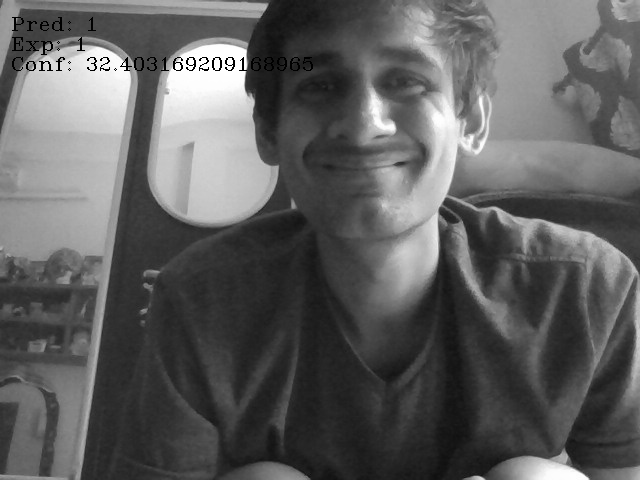

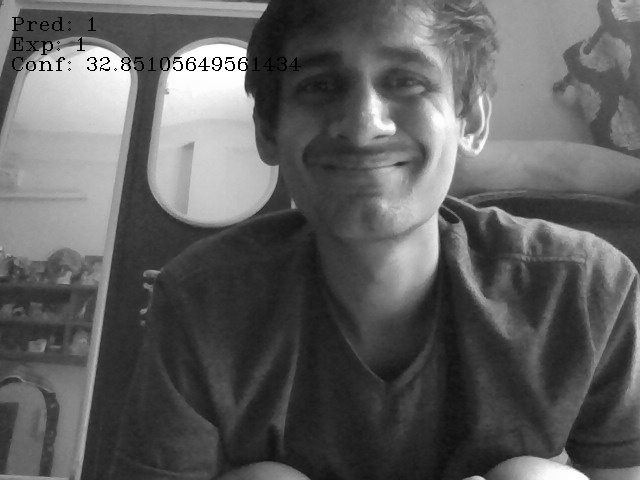

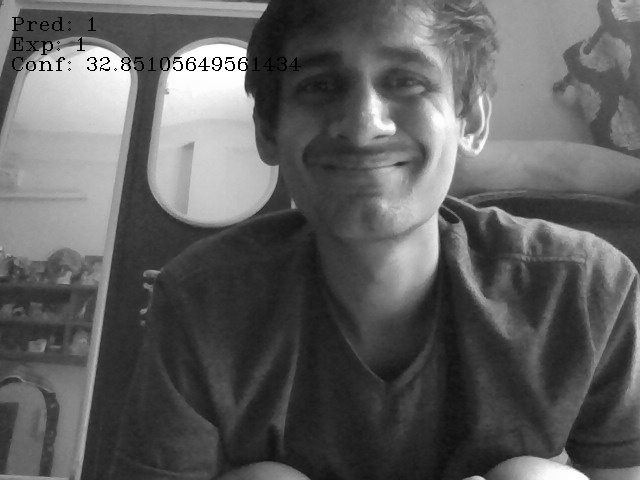

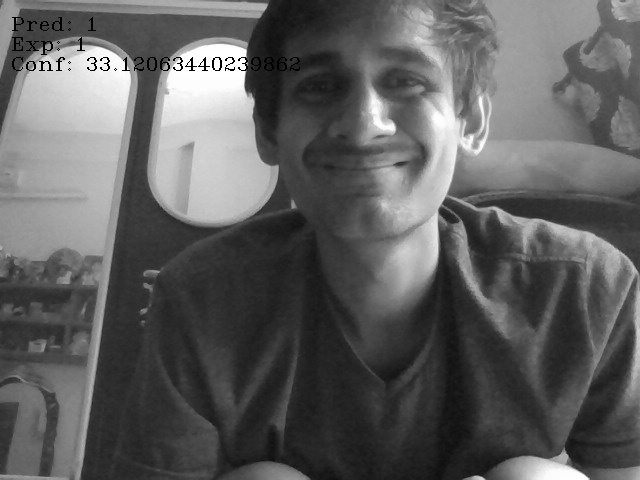

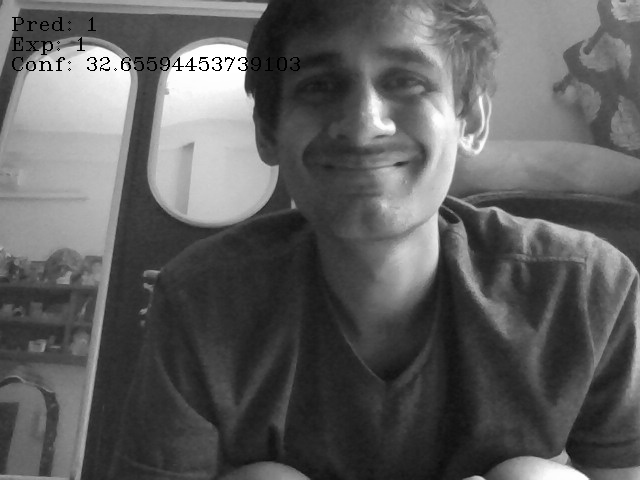

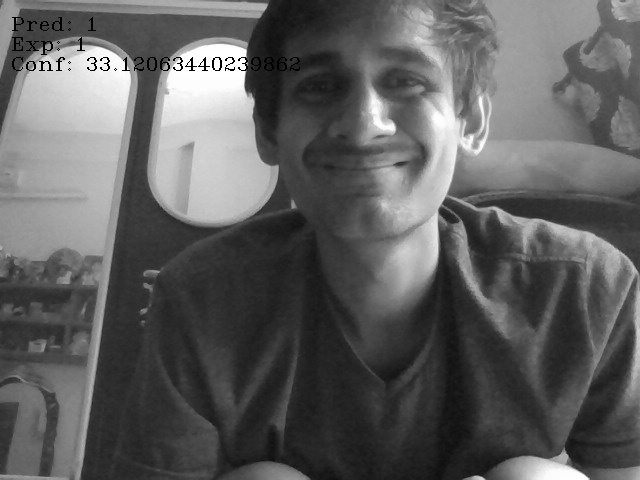

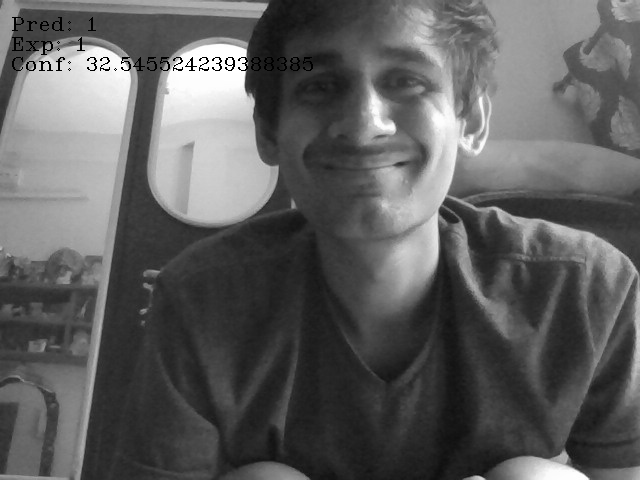

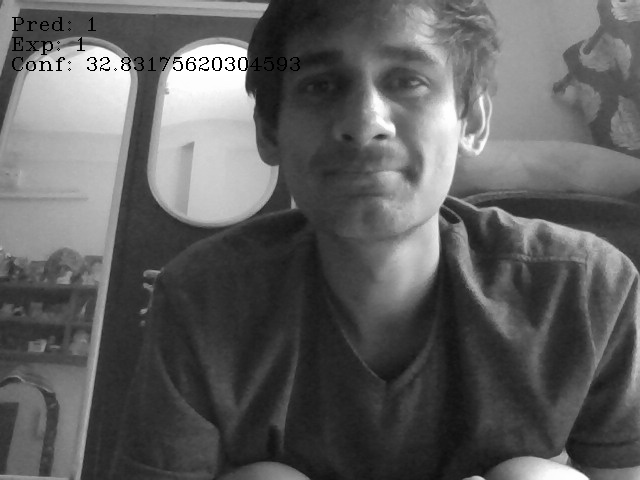

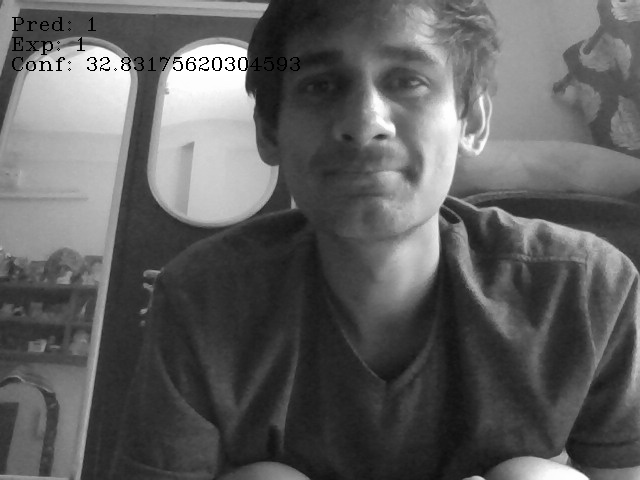

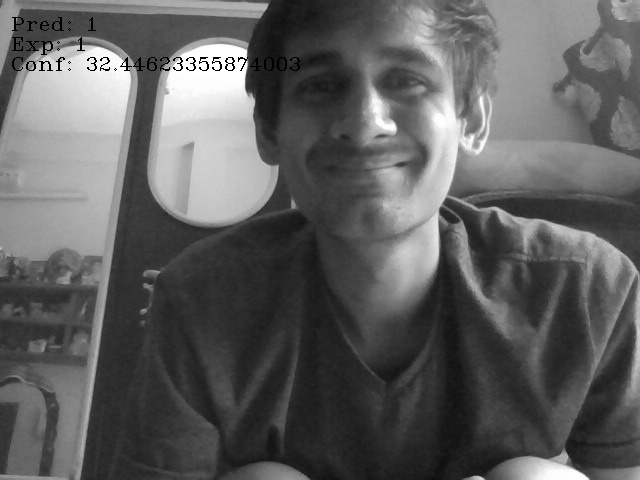

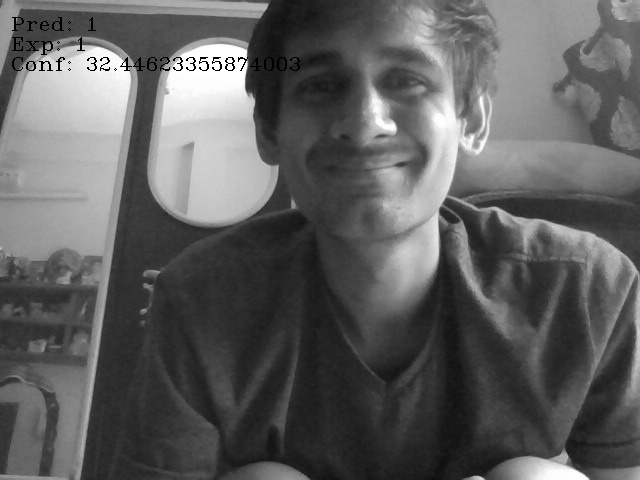

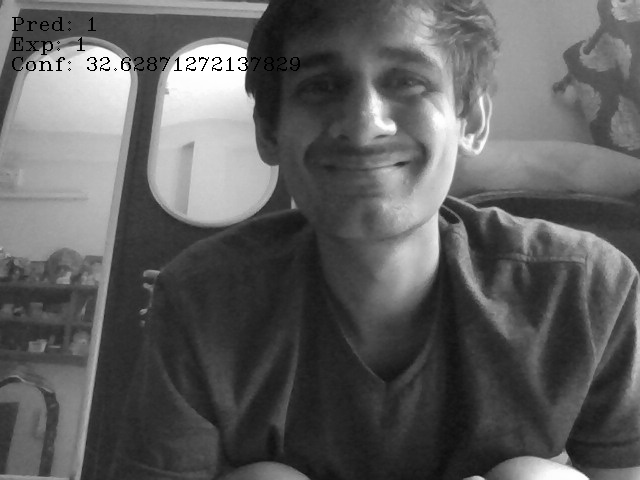

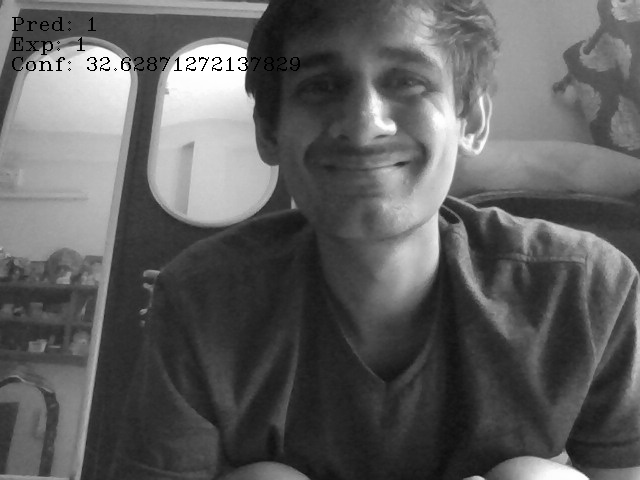

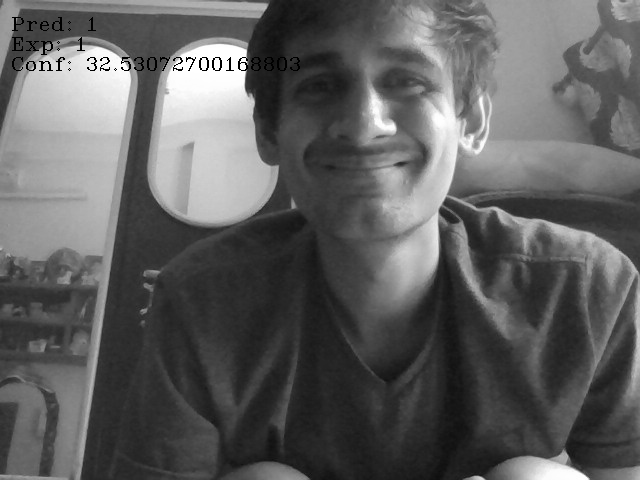

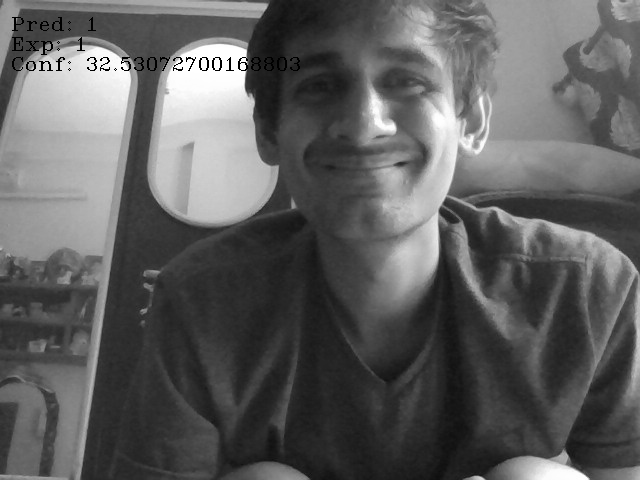

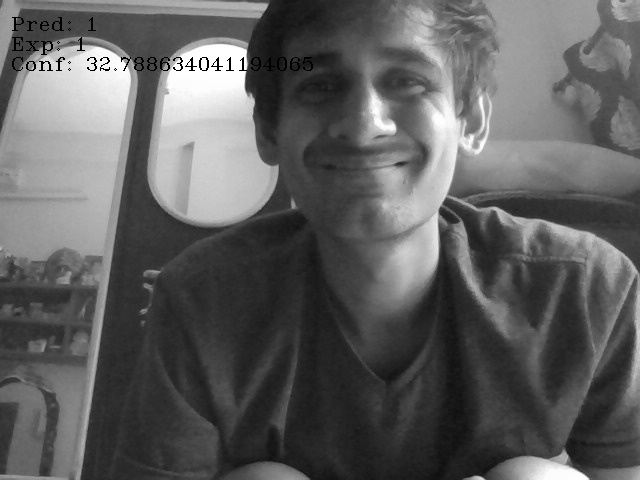

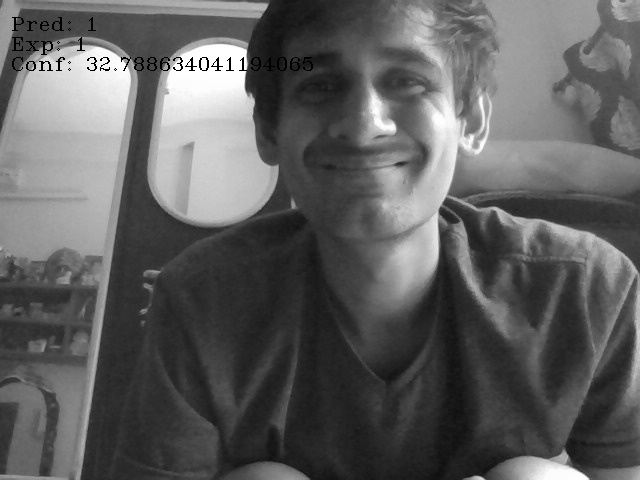

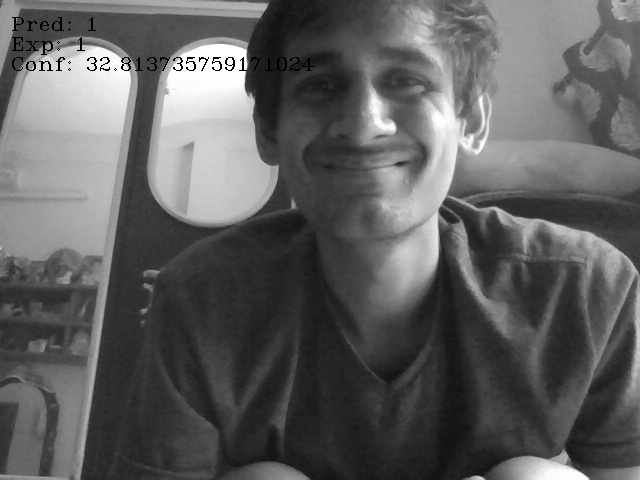

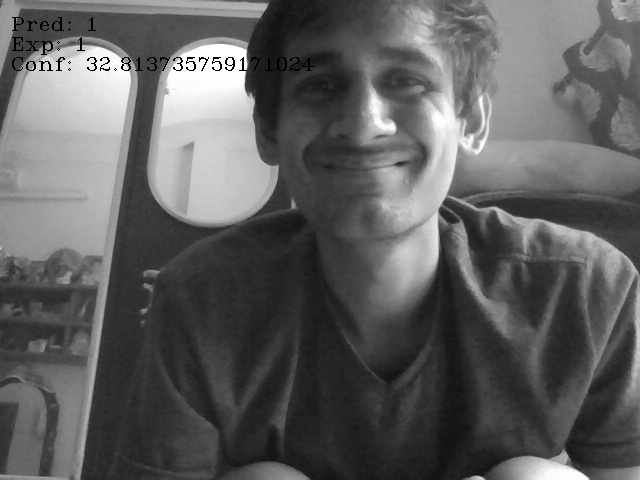

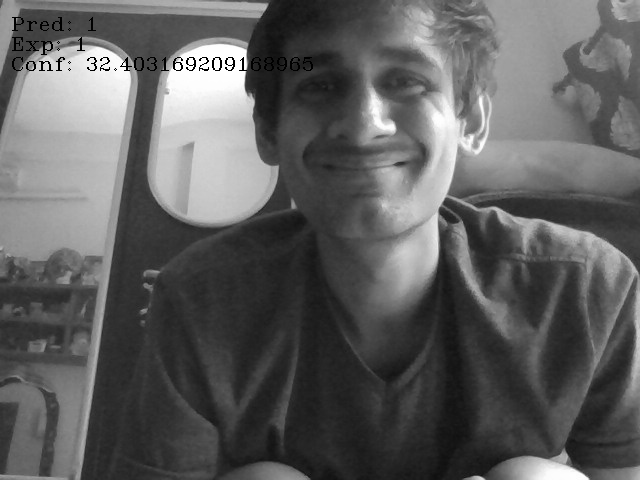

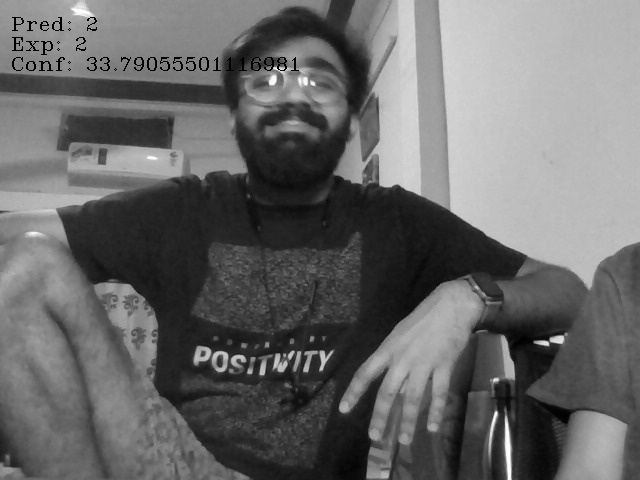

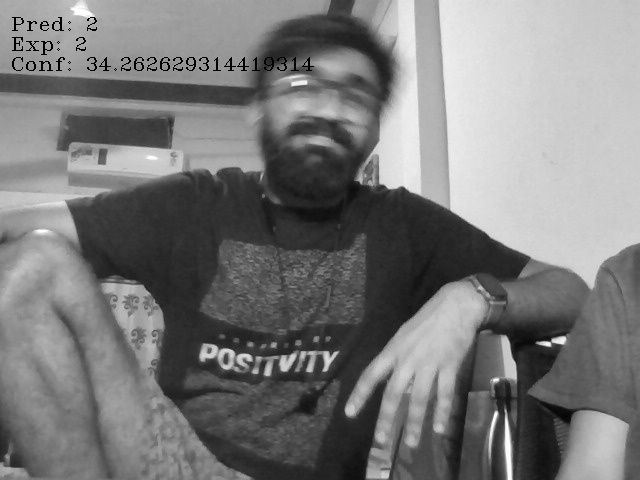

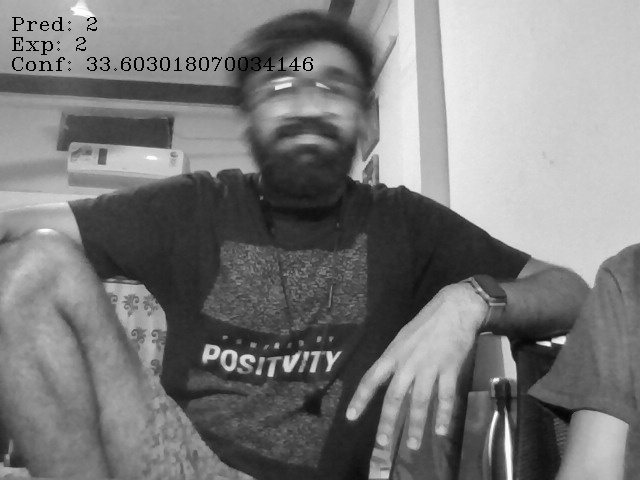

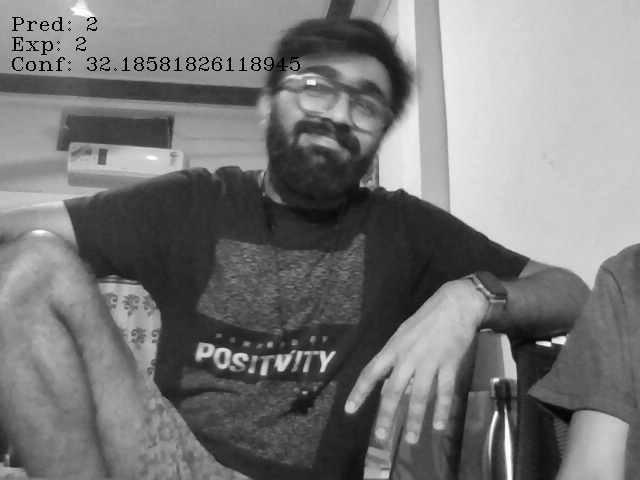

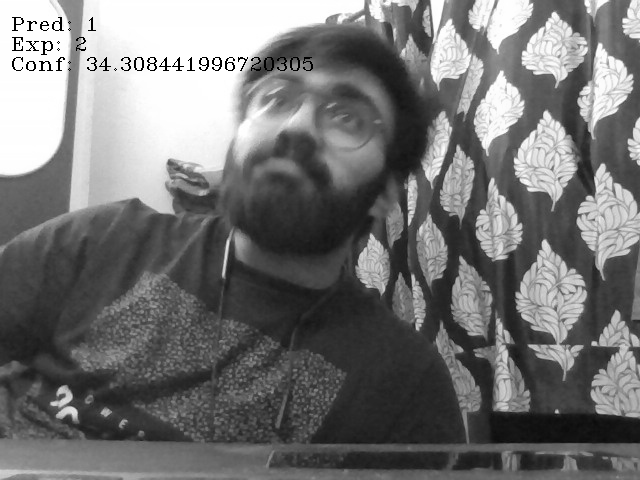

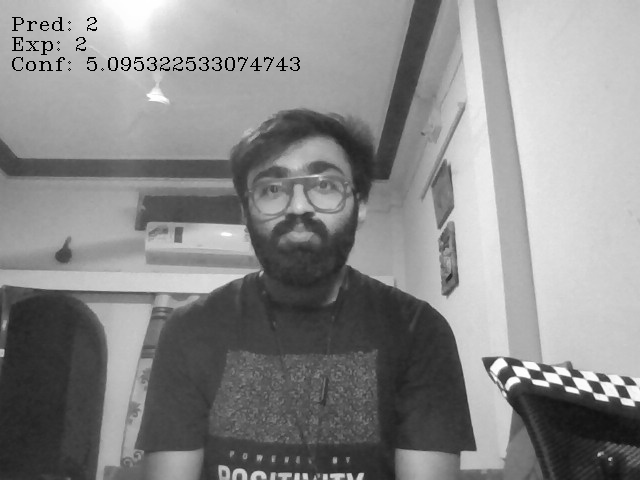

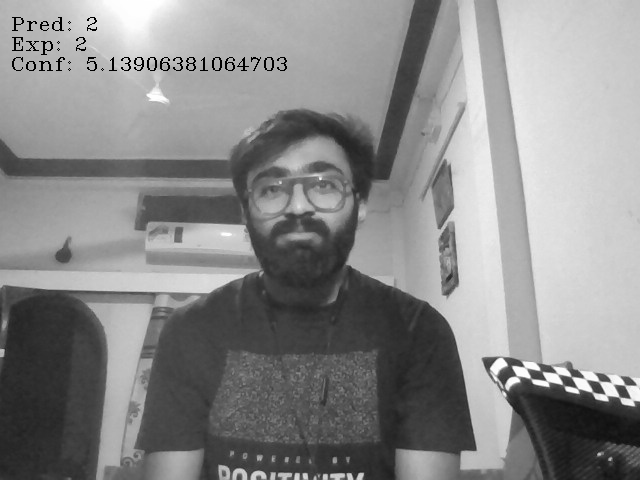

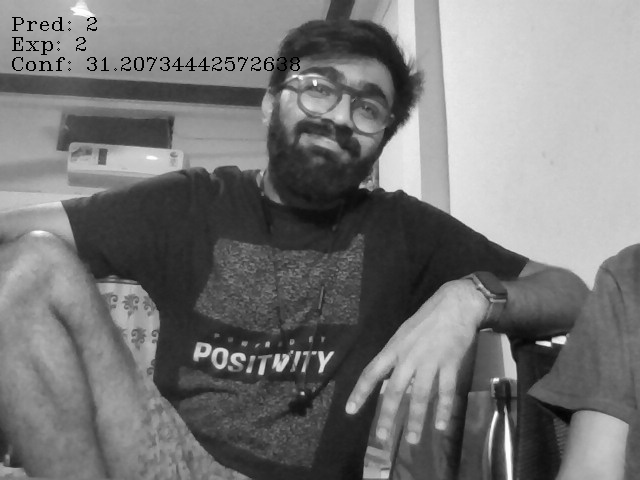

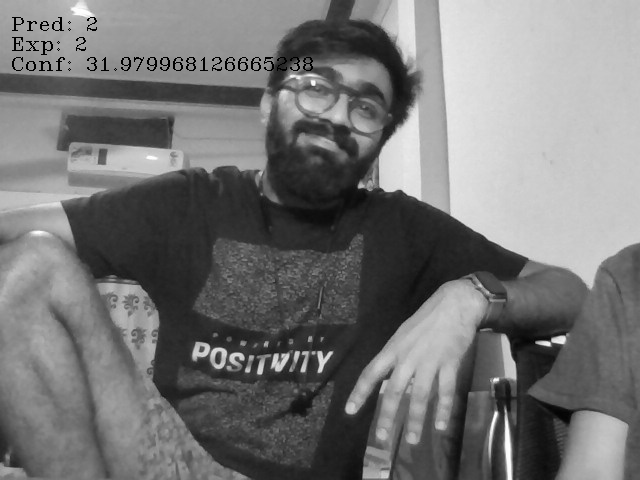

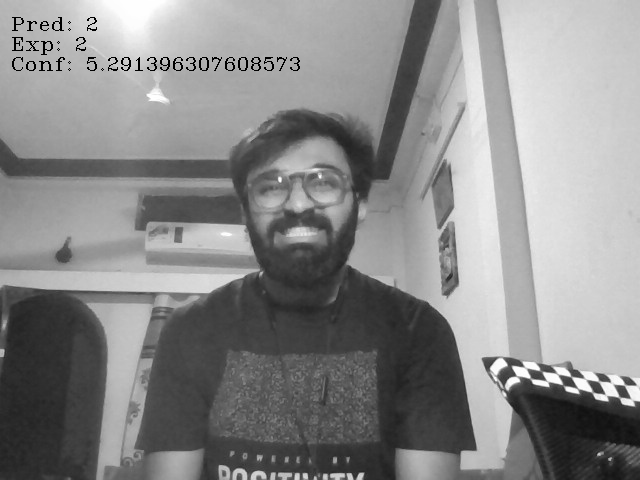

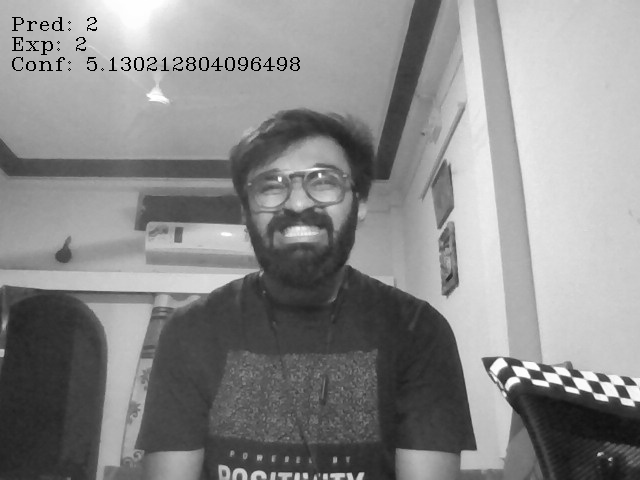

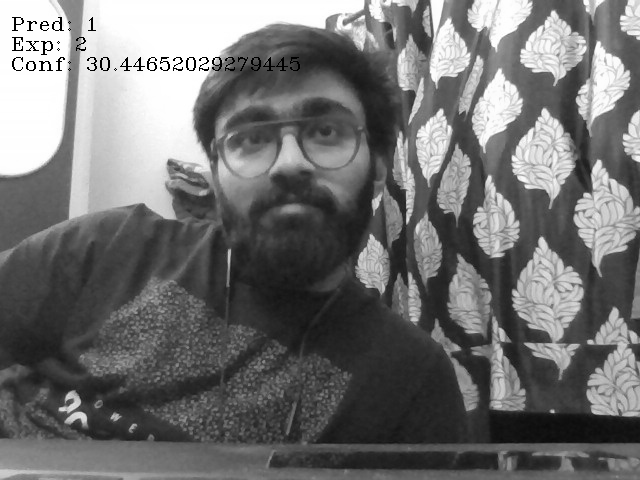

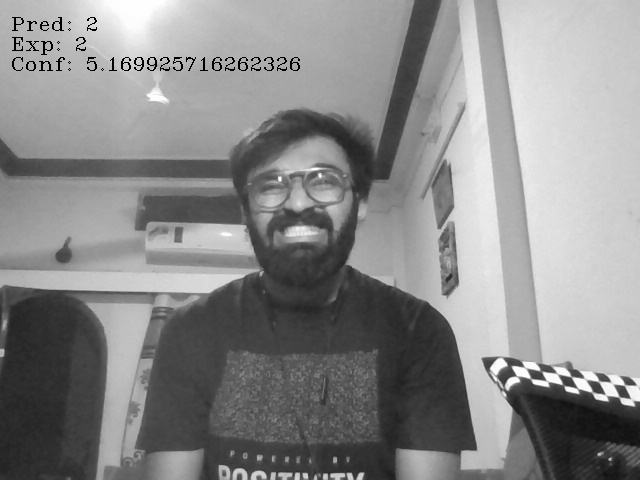

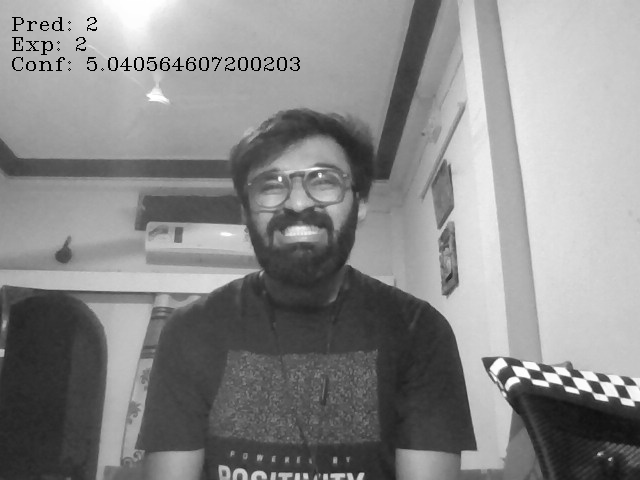

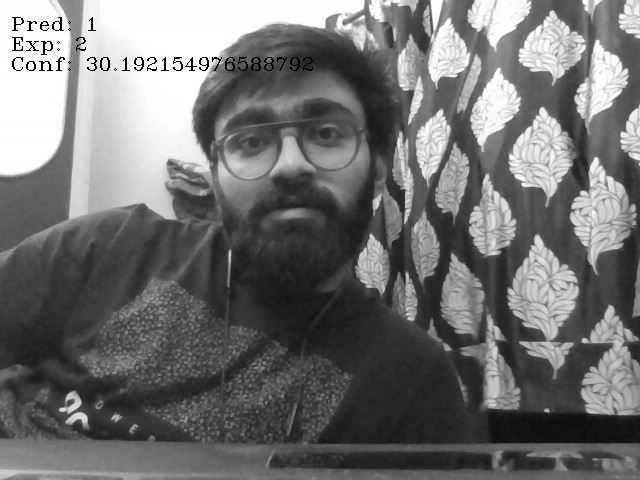

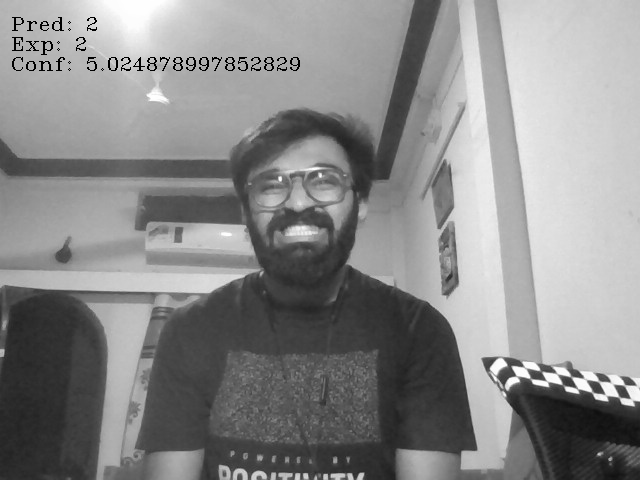

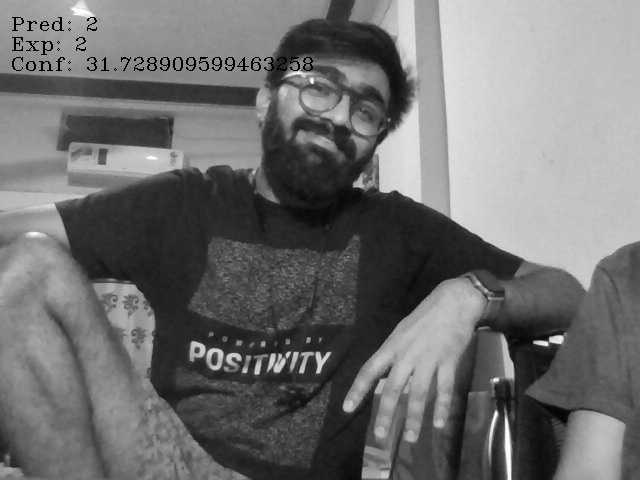

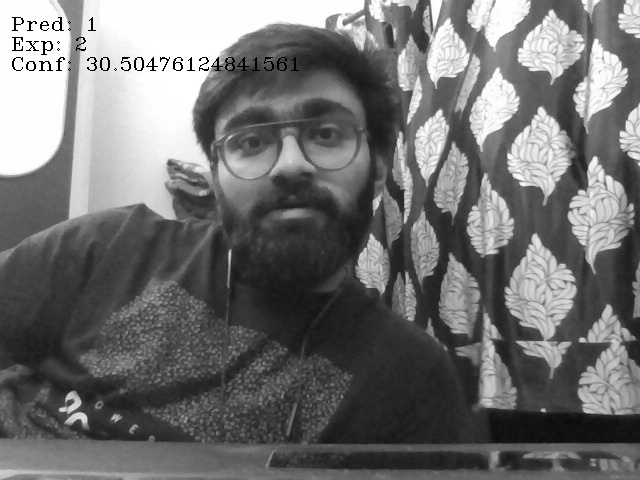

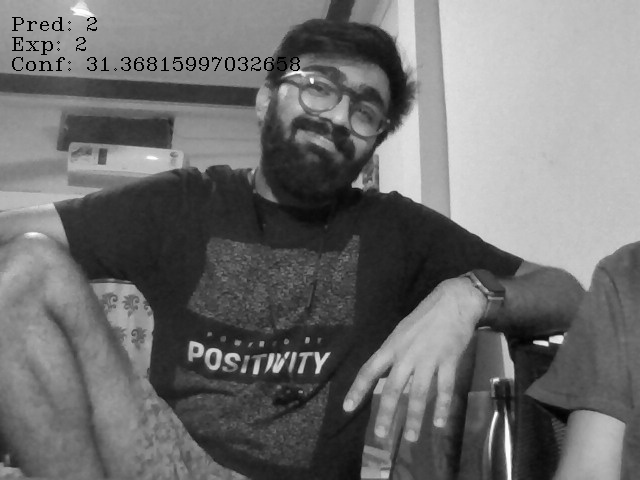

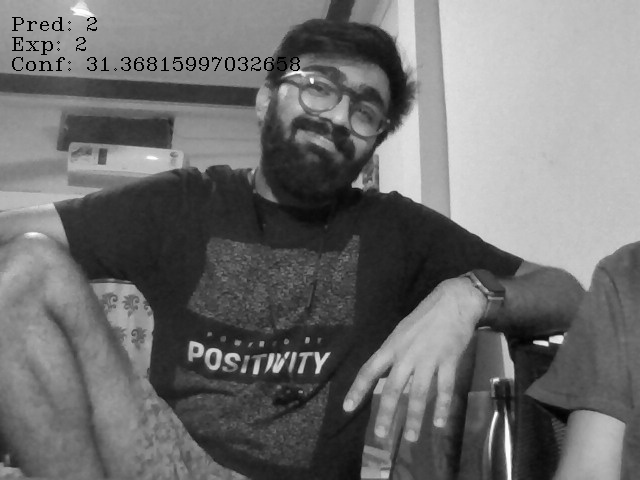

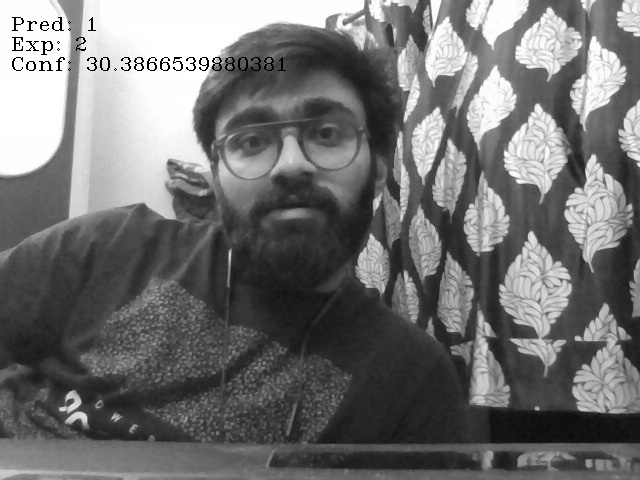

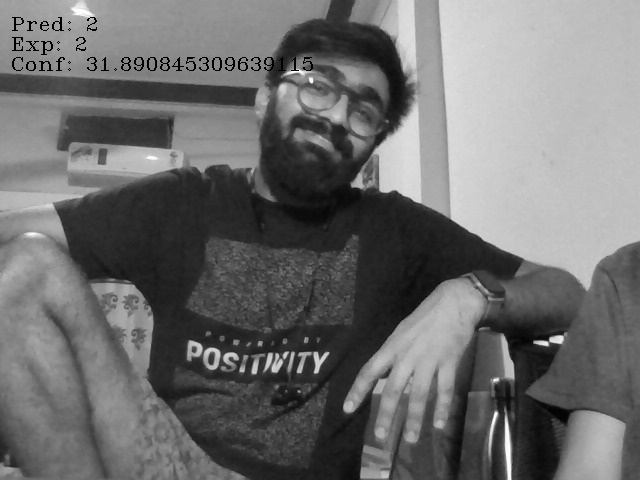

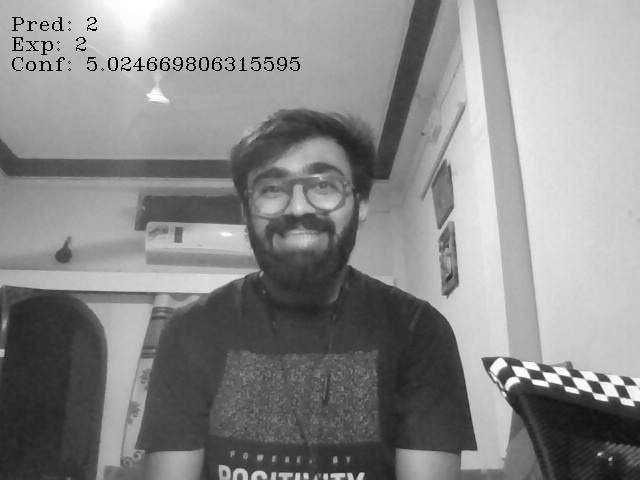

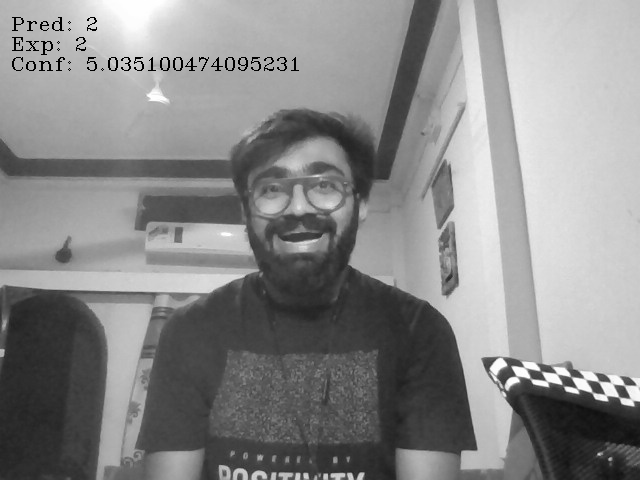

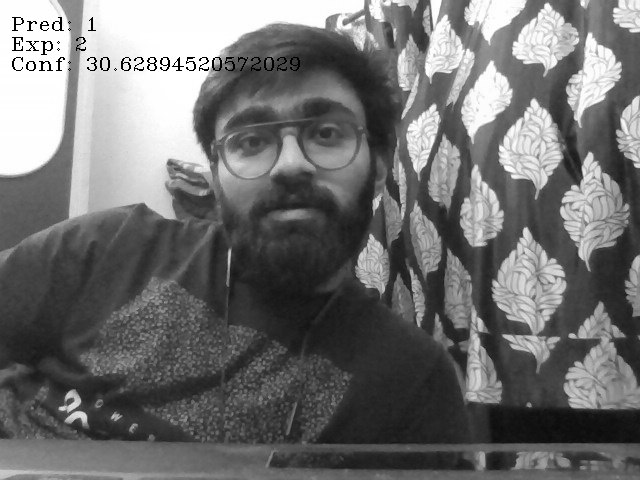

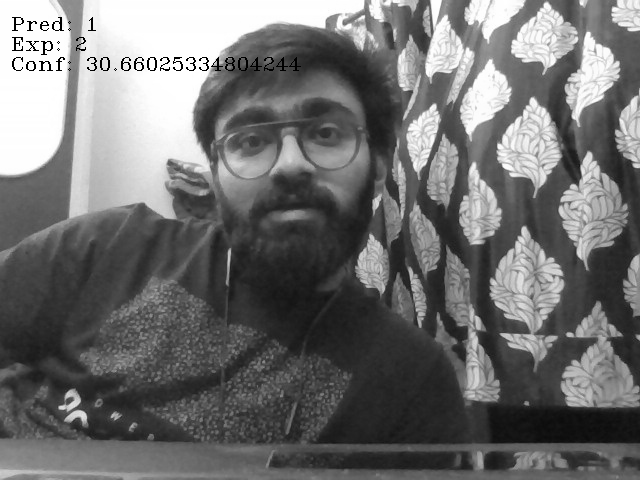

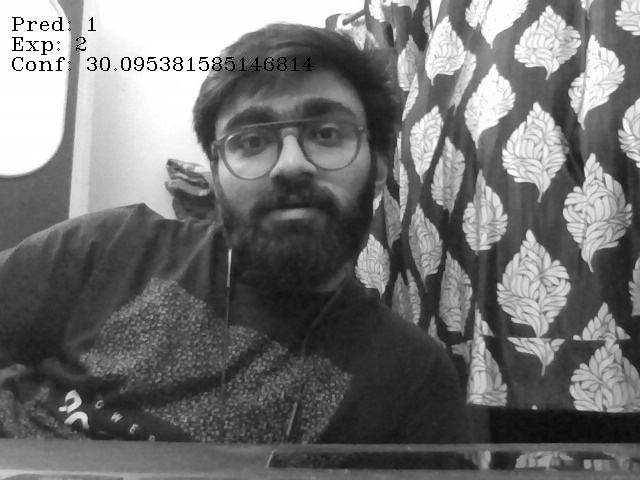

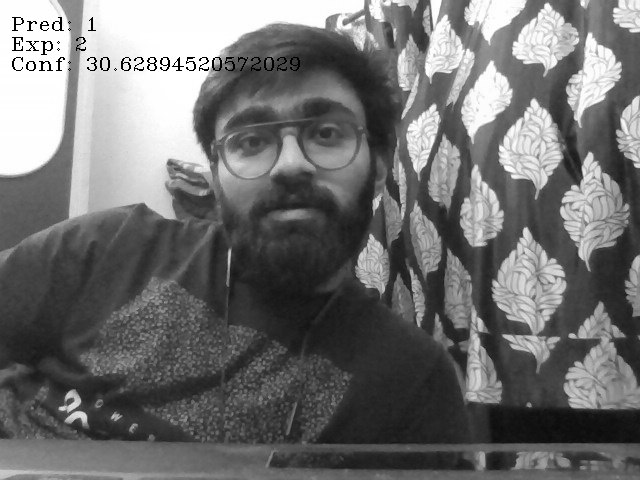

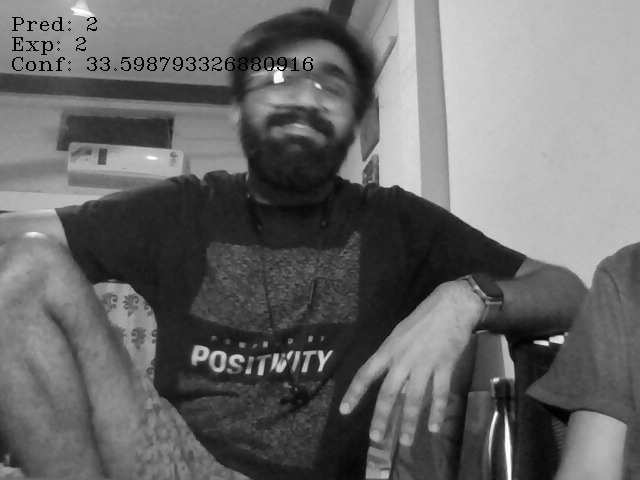

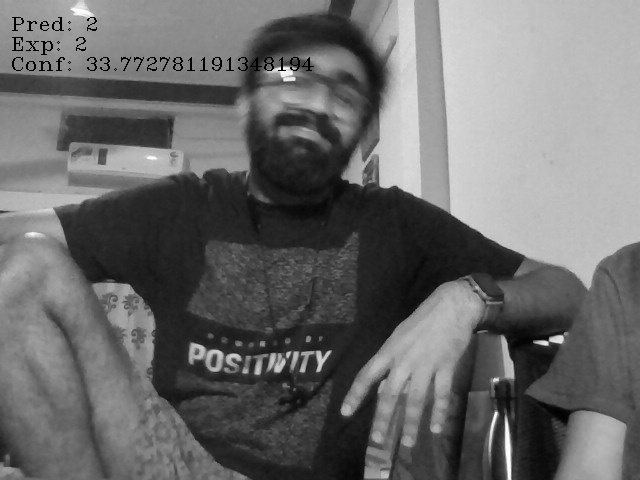

In [ ]:
paths = [os.path.join("/content/drive/MyDrive/Data science/Face Recognition/test", f) for f in os.listdir("/content/drive/MyDrive/Data science/Face Recognition/test")]
predictions = []
expected_outputs = []
for path in paths:
  #print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, conf = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split("/")[7].split('-')[0]) 

  predictions.append(prediction)
  expected_outputs.append(expected_output)

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Conf: ' + str(conf), (10, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, expected_outputs)

0.82